# SMS Spam Collection

#### Abstract: The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.

If you are facing any difficulty, follow the steps mentioned below:

Step - 1 - Getting things ready for the project
 - Import the required libraries
 - Load the data

Step - 2 - Perform the Exploratory Data Analysis on the data set

Step - 3 - Preprocess the data
 - Remove special characters
 - Conversion to lowercase
 - Tokenization
 - Stemming or Lemmatization

Step - 4 - Data Preparation
 - Train Test Split
 - Identify the target variable
 - Use Bag of Words to convert the Text data to Numerical Vectors

Step - 5 - Train the Model. Use the following algorithms:
 - Logistic Regression
 - Decision Trees
 - SVM

Step - 6 - Evaluation. For each Model, evaluate using following metrics:
 - Check accuracy score
 - Build confusion metric
 - Print Classification_report

        



## 1. Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SMSSpamCollection', sep="\t",names=['target','message'])

In [3]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2. Exploratory Data Analysis

In [4]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

target     0
message    0
dtype: int64

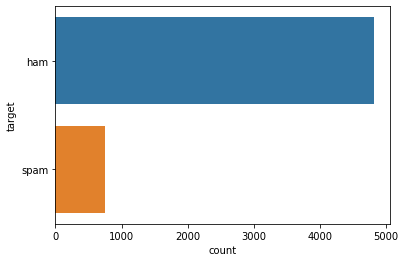

In [8]:
sns.countplot(y='target',data=df)

In [9]:
df['message'].value_counts()

Sorry, I'll call later                                                                                                                                                30
I cant pick the phone right now. Pls send a message                                                                                                                   12
Ok...                                                                                                                                                                 10
Ok                                                                                                                                                                     4
Okie                                                                                                                                                                   4
                                                                                                                                                           

In [10]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

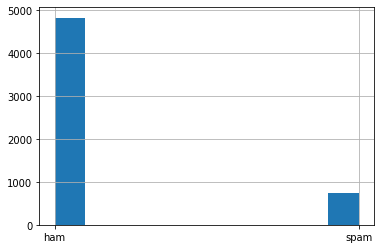

In [11]:
hist_plot=df['target'].hist(bins=10)

### Word Cloud for the Spam

In [12]:
from wordcloud import WordCloud, STOPWORDS

In [13]:
sms_df = df.loc[df['target']=='spam', :]

words = ' '.join(df['message'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

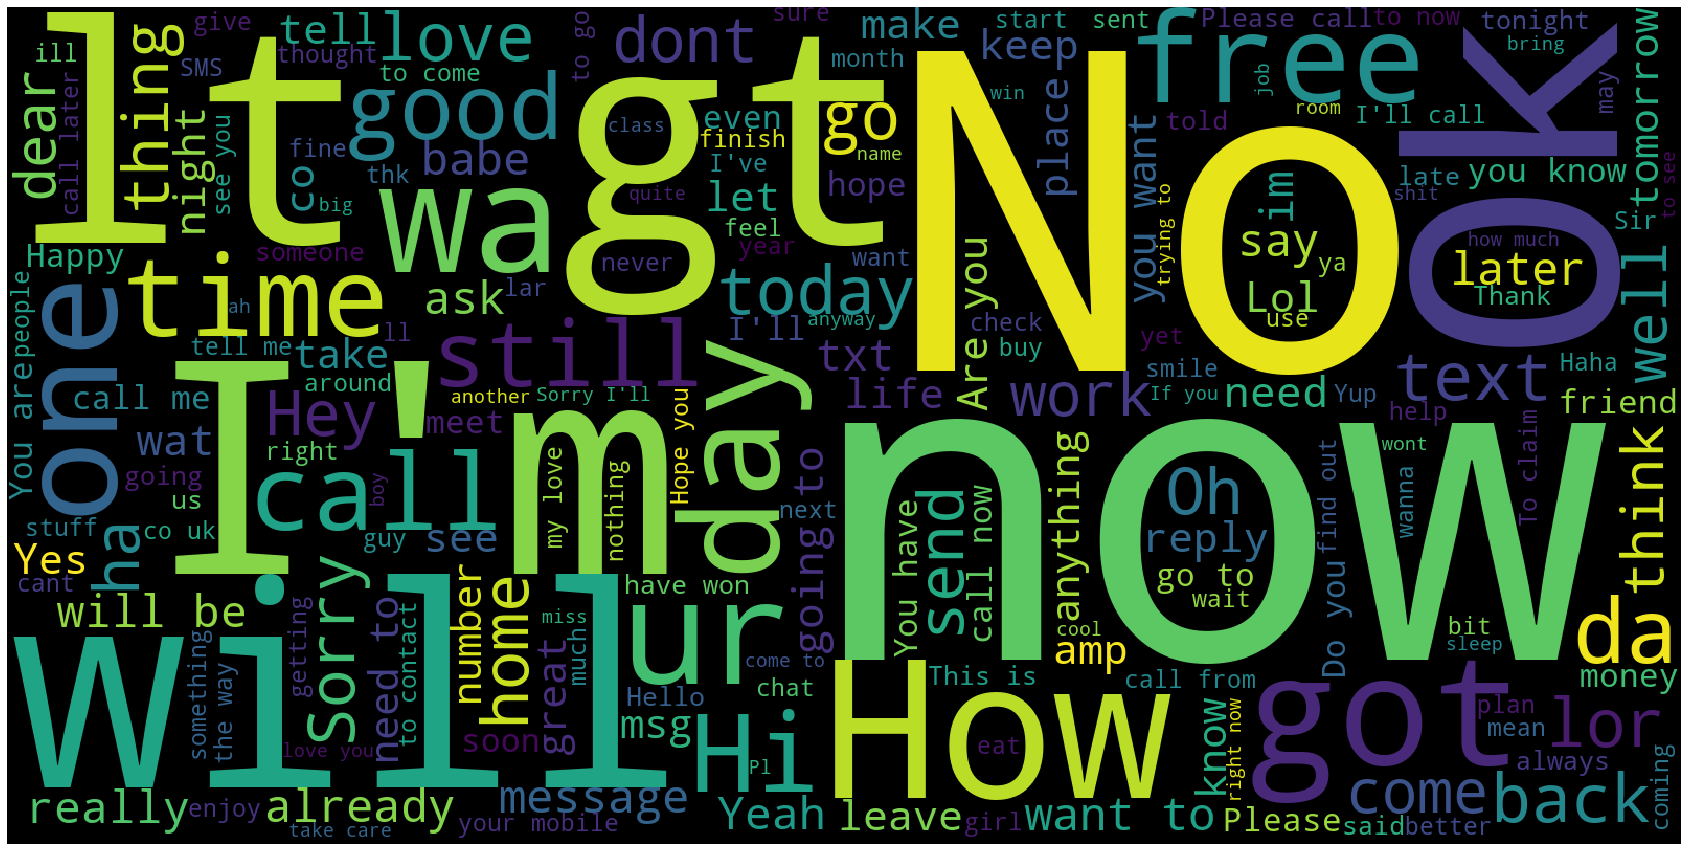

In [15]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
words = ' '.join(df['message'])

print(words[:2000])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitl

## 3. Data Preprocessing

In [17]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [18]:
stemmer = PorterStemmer()

In [19]:
lemmatizer = WordNetLemmatizer()

In [20]:
clean_message_lst = []
message_len_lst = []

In [21]:
def preprocess(raw_df, flag):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_df)
    letters_only = letters_only.lower()
    words = letters_only.split()
    words = [w for w in words if not w in stopwords.words("english")]
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_message_lst.append(" ".join(words))
    
    message_len_lst.append(len(words))

In [22]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [23]:
%%time

clean_message_lst = []

message_len_lst = []

df['message'].apply(lambda x: preprocess(x, 'stem'))

df['clean_message_stem'] = clean_message_lst

df['message_length_stem'] = message_len_lst

Wall time: 25.9 s


In [24]:
%%time

clean_message_lst = []

message_len_lst = []

df['message'].apply(lambda x: preprocess(x, 'lemma'))

df['clean_message_lema'] = clean_message_lst

df['message_length_lema'] = message_len_lst

Wall time: 29.6 s


In [25]:
df.head()

,target,message,clean_message_stem,message_length_stem,clean_message_lema,message_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


## 4. Data Preparation

In [26]:
df['tgt']=df['target'].apply(lambda x: 0 if x=='spam' else 1)

df.head()

,target,message,clean_message_stem,message_length_stem,clean_message_lema,message_length_lema,tgt
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,1


In [27]:
from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

In [28]:
train_clean_message=[]
for message in train['clean_message_stem']:
    train_clean_message.append(message)

test_clean_message=[]
for message in test['clean_message_stem']:
    test_clean_message.append(message)

### Text to numerical vector using Bag of Words

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_message)

test_features = vectorizer.transform(test_clean_message)

In [30]:
vectorizer.vocabulary_

{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [31]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


## 5. Model Building and Evaluation

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

In [34]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['tgt'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['tgt'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    con_matrix = confusion_matrix(pred,test['tgt'])
    print('Confusion Matrix of '+classifier.__class__.__name__+' is '+str(con_matrix))
    class_report = classification_report(pred,test['tgt'])
    print('Classification Matrix of '+classifier.__class__.__name__+' is '+str(class_report))

 33%|██████████████▋                             | 1/3 [00:04<00:08,  4.10s/it]

Accuracy of LogisticRegression is 0.9838565022421525
Confusion Matrix of LogisticRegression is [[132   1]
 [ 17 965]]
Classification Matrix of LogisticRegression is               precision    recall  f1-score   support

           0       0.89      0.99      0.94       133
           1       1.00      0.98      0.99       982

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



 67%|█████████████████████████████▎              | 2/3 [00:32<00:11, 11.40s/it]

Accuracy of DecisionTreeClassifier is 0.9757847533632287
Confusion Matrix of DecisionTreeClassifier is [[129   7]
 [ 20 959]]
Classification Matrix of DecisionTreeClassifier is               precision    recall  f1-score   support

           0       0.87      0.95      0.91       136
           1       0.99      0.98      0.99       979

    accuracy                           0.98      1115
   macro avg       0.93      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



100%|████████████████████████████████████████████| 3/3 [01:55<00:00, 38.48s/it]

Accuracy of SVC is 0.9838565022421525
Confusion Matrix of SVC is [[131   0]
 [ 18 966]]
Classification Matrix of SVC is               precision    recall  f1-score   support

           0       0.88      1.00      0.94       131
           1       1.00      0.98      0.99       984

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



### Saving the Model and Encoder in Pickle

In [35]:
model = LogisticRegression()
model.fit(dense_features,train['tgt'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
from pickle import dump

dump(vectorizer, open('countvectorizer.pkl', 'wb'))

dump(model, open('logit_model.pkl', 'wb'))

### Prediction on Future Data Points

In [37]:
from pickle import load

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [39]:
def preprocess(raw_message):
   
    letters_only = re.sub("[^a-zA-Z]", " ",raw_message)
    
    letters_only = letters_only.lower()

    words = letters_only.split()
             
    words = [w for w in words if not w in stopwords.words("english")]
    
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [40]:
def predict(message):
    
    vectorizer = load(open('countvectorizer.pkl', 'rb'))
    
    classifier = load(open('logit_model.pkl', 'rb'))
    
    clean_message = preprocess(message)
    
    clean_message_encoded = vectorizer.transform([clean_message])
    
    message_input = clean_message_encoded.toarray()
    
    prediction = classifier.predict(clean_message_encoded)
    
    return prediction

In [41]:
msg = input("Enter a message to check its sentiment: ")

prediction = predict(message)

print(prediction)

Enter a message to check its sentiment: Sorry, I'll call later  
[1]


In [42]:
if(prediction ==0 ):
    print("Spam")
else:
    print("Ham")

Ham
